## ЧАСТЬ A

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE

## Извлечение датасета

In [2]:
#Заголовки данных согласно файлу с описанием glass.tag --Variant 11
data_headers = ["ID", "RI", "NA2O", "MGO", "AL2O3", "SIO2", "K2O", "CAO", "BAO", "FE2O3", "TYPE"]
data = pd.read_csv('C:/Учеба/Мага/1 семестр/Интеллектуальные системы и технологии/Практика 3-4/glass.data', names=data_headers)
data.head(10)

,ID,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


## Соответствие значений столбца TYPE и названий типов

In [3]:
types = data.iloc[:,10]
types_name = {1: "building_windows_float_processed",
            2 : "building_windows_non_float_processed",
            3 : "vehicle_windows_float_processed",
            5 : "containers",
            6 : "tableware",
            7 :"headlamps"}

## Предварительно масштабируем данные

In [4]:
data_x = data.iloc[:, 1:-1].values
scaler = preprocessing.StandardScaler()
data_scaled = scaler.fit_transform(data_x)
print('Исходные данные')
print(data_x)
print('\nПосле масштабирования')
print(data_scaled)

Исходные данные
[[ 1.52101 13.64     4.49    ...  8.75     0.       0.     ]
 [ 1.51761 13.89     3.6     ...  7.83     0.       0.     ]
 [ 1.51618 13.53     3.55    ...  7.78     0.       0.     ]
 ...
 [ 1.52065 14.36     0.      ...  8.44     1.64     0.     ]
 [ 1.51651 14.38     0.      ...  8.48     1.57     0.     ]
 [ 1.51711 14.23     0.      ...  8.62     1.67     0.     ]]

После масштабирования
[[ 0.87286765  0.28495326  1.25463857 ... -0.14576634 -0.35287683
  -0.5864509 ]
 [-0.24933347  0.59181718  0.63616803 ... -0.79373376 -0.35287683
  -0.5864509 ]
 [-0.72131806  0.14993314  0.60142249 ... -0.82894938 -0.35287683
  -0.5864509 ]
 ...
 [ 0.75404635  1.16872135 -1.86551055 ... -0.36410319  2.95320036
  -0.5864509 ]
 [-0.61239854  1.19327046 -1.86551055 ... -0.33593069  2.81208731
  -0.5864509 ]
 [-0.41436305  1.00915211 -1.86551055 ... -0.23732695  3.01367739
  -0.5864509 ]]


## Разбиваем данные на обучающую и тестовую выборку

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled,
                                                    types,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    stratify=types,
                                                    random_state=151)

## Производим балансировку классов в обучающих данных, чтобы выровнять число экземпляров для всех классов

In [6]:
sm = SMOTE ()

In [7]:
X_train_res, y_train_res = sm.fit_resample(X_train,y_train)

## Посмотрим как изменились данные после балансировки (на примере самых малочисленных классов)

In [8]:
print ("До балансировки, количество объектов класса '5': {0}".format (sum (y_train==5)))
print ("До балансировки, количество объектов класса '6': {0}\n".format (sum (y_train==6)))
print ("После балансировки, размерность обучающего набора X_train_res: {0}".format (X_train_res.shape))
print ("После балансировки, размерность обучающего набора y_train_res: {0}\n".format (y_train_res.shape))
print ("После балансировки, количество объектов класса '5': {0}".format (sum (y_train_res==6)))
print ("После балансировки, количество объектов класса '6': {0}".format (sum (y_train_res==6)))

До балансировки, количество объектов класса '5': 9
До балансировки, количество объектов класса '6': 6

После балансировки, размерность обучающего набора X_train_res: (318, 9)
После балансировки, размерность обучающего набора y_train_res: (318,)

После балансировки, количество объектов класса '5': 53
После балансировки, количество объектов класса '6': 53


## Обучение модели linear

In [ ]:
C = 10.0  # Параметр регуляризации
svm = SVC(kernel='linear', C=C, gamma=0.1, degree=1.0).fit(X_train_res,y_train_res)
# Поиск по сетке определил следующие параметры для linear
# SVC(C=10.0, degree=1.0, gamma=0.1, kernel='linear')

#### До балансировки
Точность предсказания, Precision, Recall, F1 measure для обучающей выборки\
Accuracy: 0.7046979865771812\
Precision: 0.6642480885898319\
Recall: 0.7046979865771812\
F1 measure: 0.6803987663305248

Точность предсказания, Precision, Recall, F1 measure для тестовой выборки\
Accuracy: 0.6615384615384615\
Precision: 0.6401193633952253\
Recall: 0.6615384615384615\
F1 measure: 0.6339250493096646

#### Удалось достичь с применением балансировки
Точность предсказания, Precision, Recall, F1 measure для обучающей выборки\
Accuracy: 0.89937106918239\
Precision: 0.8979202882804577\
Recall: 0.89937106918239\
F1 measure: 0.897905862014773

Точность предсказания, Precision, Recall, F1 measure для тестовой выборки\
Accuracy: 0.676923076923077\
Precision: 0.722238310708899\
Recall: 0.676923076923077\
F1 measure: 0.690123952414974

## Обучение модели RBF

In [22]:
C = 3.0  # Параметр регуляризации
svm = SVC(kernel='rbf', gamma=1.4, degree=0.1, C=C).fit(X_train_res,y_train_res)
# Поиск по сетке определил следующие параметры для rbf
# {'C': 3.0, 'degree': 0.1, 'gamma': 1.4, 'kernel': 'rbf'}

#### До балансировки
Точность предсказания, Precision, Recall, F1 measure для обучающей выборки\
Accuracy: 0.8657718120805369\
Precision: 0.8660878519938923\
Recall: 0.8657718120805369\
F1 measure: 0.8572198573993356

Точность предсказания, Precision, Recall, F1 measure для тестовой выборки\
Accuracy: 0.676923076923077\
Precision: 0.6130399012751954\
Recall: 0.676923076923077\
F1 measure: 0.6317925179675487

#### Удалось достичь с применением балансировки
Точность предсказания, Precision, Recall, F1 measure для обучающей выборки\
Accuracy: 0.9842767295597484\
Precision: 0.984382111907084\
Recall: 0.9842767295597484\
F1 measure: 0.9842140156605566

Точность предсказания, Precision, Recall, F1 measure для тестовой выборки\
Accuracy: 0.6923076923076923\
Precision: 0.6807692307692308\
Recall: 0.6923076923076923\
F1 measure: 0.6627442440219494

## Обучение полиномиальной модели

In [ ]:
C = 1.0  # Параметр регуляризации
svm = SVC(kernel='poly', degree=2.0, gamma = 2.4, C=C).fit(X_train_res,y_train_res)
# Поиск по сетке определил следующие параметры для poly
# {'C': 1.0, 'degree': 2.0, 'gamma': 2.4, 'kernel': 'poly'}

#### До балансировки
Точность предсказания, Precision, Recall, F1 measure для обучающей выборки\
Accuracy: 0.9328859060402684\
Precision: 0.9341117765395559\
Recall: 0.9328859060402684\
F1 measure: 0.9327306972384667

Точность предсказания, Precision, Recall, F1 measure для тестовой выборки\
Accuracy: 0.6615384615384615\
Precision: 0.6292307692307691\
Recall: 0.6615384615384615\
F1 measure: 0.636613416982774

#### Удалось достичь с применением балансировки
Точность предсказания, Precision, Recall, F1 measure для обучающей выборки\
Accuracy: 0.9622641509433962\
Precision: 0.9620148247978438\
Recall: 0.9622641509433962\
F1 measure: 0.9618902208456367

Точность предсказания, Precision, Recall, F1 measure для тестовой выборки\
Accuracy: 0.6923076923076923\
Precision: 0.7088770999115827\
Recall: 0.6923076923076923\
F1 measure: 0.6868307552001122

## Обучение сигмоидальной модели

In [ ]:
C = 2.0  # Параметр регуляризации
svm = SVC(kernel='sigmoid', gamma=0.1, C=C).fit(X_train_res,y_train_res)
# Поиск по сетке определил следующие параметры для sigmoid
# SVC(C=2.0, degree=0.1, gamma=0.1, kernel='sigmoid')

Точность предсказания, Precision, Recall, F1 measure для обучающей выборки\
Accuracy: 0.6666666666666666\
Precision: 0.6674413683687876\
Recall: 0.6666666666666666\
F1 measure: 0.6626507456620728

Точность предсказания, Precision, Recall, F1 measure для тестовой выборки\
Accuracy: 0.38461538461538464\
Precision: 0.48612655318537673\
Recall: 0.38461538461538464\
F1 measure: 0.40655978168173296

## Предсказание на тестовой выборке

In [23]:
y_test_pred = svm.predict(X_test)

## Точность предсказания, Precision, Recall, F1 measure для обучающей выборки

In [24]:
from sklearn import metrics
y_train_pred = svm.predict(X_train_res)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train_res, y_train_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_train_res, y_train_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_train_res, y_train_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("F1 measure:",metrics.f1_score(y_train_res, y_train_pred, average='weighted'))

Accuracy: 0.9842767295597484
Precision: 0.984382111907084
Recall: 0.9842767295597484
F1 measure: 0.9842140156605566


## Точность предсказания, Precision, Recall, F1 measure для тестовой выборки

In [25]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_test_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_test_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("F1 measure:",metrics.f1_score(y_test, y_test_pred, average='weighted'))

Accuracy: 0.6923076923076923
Precision: 0.6807692307692308
Recall: 0.6923076923076923
F1 measure: 0.6627442440219494


c:\users\fisen\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Опорные вектора

In [13]:
# get support vectors
print("Support Vectors")
print(svm.support_vectors_)

# get indices of support vectors
print("\nIndices of support vectors")
print(svm.support_)

# get number of support vectors for each class
print("\nNumber of support vectors for each class")
print(svm.n_support_)

Support Vectors
[[ 0.42728779  1.67197817  0.74040464 ...  0.03031176 -0.35287683
  -0.5864509 ]
 [ 1.2425339   0.984603    0.78904839 ...  0.43176984 -0.35287683
  -0.5864509 ]
 [ 1.10720964  0.12538402  0.81684482 ...  0.41064047 -0.35287683
   0.54511092]
 ...
 [ 1.55509994  0.22657668  0.37044654 ... -0.01910413 -0.35287683
  -0.5864509 ]
 [-0.68915256 -1.17585968 -1.86551055 ...  0.06902876  0.07225475
  -0.55966817]
 [ 0.82370081  0.66426019 -0.29701426 ... -0.08942135 -0.00647576
  -0.5864509 ]]

Indices of support vectors
[  6   7   8  10  25  27  34  38  42  51  54  63  65  66  68  72  75  76
  81  97 100 101 102 103 104 110 112 116 118 125 126 131 134 137 146   1
   2   3   9  16  19  20  21  22  23  24  31  36  37  39  48  52  53  55
  61  64  67  69  70  77  80  83  86  87  90  96 106 107 114 115 120 121
 127 128 139 143 144 145 147   4  35  41  50  79  84  89 111 122 129 130
 155 157 158 159 163 165 175 178 182 183 184 187 188  29  43  45  73  91
  98 108 132 133 198 210 2

## Grid search

In [14]:
grid_params = {
    'kernel':('linear', 'rbf','poly', 'sigmoid'),
    'C':[1.0,2.0,3.0,10.0],
    'gamma':[x/10 for x in range(1, 30)],
    'degree':[x/10 for x in range(1,50)]
}

gs = GridSearchCV(SVC(),
    grid_params,
    verbose=1,
    cv=3,
    n_jobs=-1)

gs_results = gs.fit(X_train_res, y_train_res)
#Fitting 3 folds for each of 22736 candidates, totalling 68208 fits

Fitting 3 folds for each of 22736 candidates, totalling 68208 fits


In [15]:
gs_results.best_score_
#0.889937106918239

0.889937106918239

In [16]:
gs_results.best_estimator_
#SVC(C=3.0, degree=0.1, gamma=1.4)

SVC(C=3.0, degree=0.1, gamma=1.4)

In [17]:
gs_results.best_params_
#{'C': 3.0, 'degree': 0.1, 'gamma': 1.4, 'kernel': 'rbf'}

{'C': 3.0, 'degree': 0.1, 'gamma': 1.4, 'kernel': 'rbf'}

## Снижение размерности обучающих данных для рисования при помощи TSNE

In [26]:
train_tsne = TSNE(init='random', perplexity=12.0, random_state = 151).fit_transform(X_train_res)

c:\users\fisen\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


## Отображение обучающего набора данных

[Text(0.5, 1.0, 'T-SNE projection of training data')]

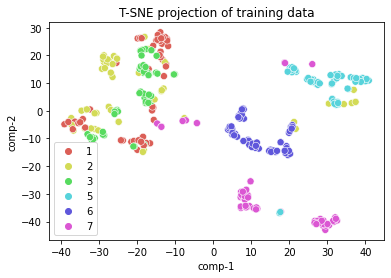

In [27]:
train_tsne_df = pd.DataFrame()
train_tsne_df["y"] = y_train_res
train_tsne_df["comp-1"] = train_tsne[:,0]
train_tsne_df["comp-2"] = train_tsne[:,1]
sns.scatterplot(x="comp-1",
                y="comp-2",
                hue=train_tsne_df.y.tolist(),
                palette=sns.color_palette("hls", len(Counter(train_tsne_df.y.tolist()))),
                data=train_tsne_df,
                s=50).set(title="T-SNE projection of training data") 

## Отображение результата классификации обучающего набора данных

[Text(0.5, 1.0, 'T-SNE projection of prediction on training data')]

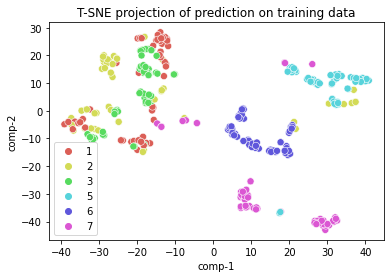

In [28]:
sns.scatterplot(x="comp-1",
                y="comp-2",
                hue=y_train_pred,
                palette=sns.color_palette("hls", len(Counter(y_train_pred))),
                data=train_tsne_df,
                s=50).set(title="T-SNE projection of prediction on training data") 

## Снижение размерности тестовых данных для отображения при помощи TSNE

In [29]:
test_tsne = TSNE(init='random', perplexity=20.0, random_state = 151).fit_transform(X_test)

c:\users\fisen\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


## Отображение тестового набора данных

[Text(0.5, 1.0, 'T-SNE projection of test data')]

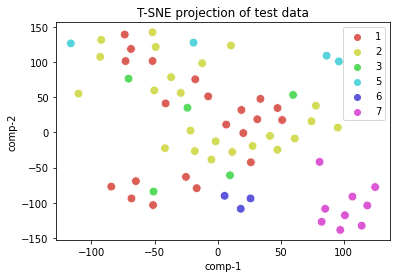

In [30]:
test_tsne_df = pd.DataFrame()
test_tsne_df["y"] = y_test
test_tsne_df["comp-1"] = test_tsne[:,0]
test_tsne_df["comp-2"] = test_tsne[:,1]
sns.scatterplot(x="comp-1",
                y="comp-2",
                hue=test_tsne_df.y.tolist(),
                palette=sns.color_palette("hls", len(Counter(test_tsne_df.y.tolist()))),
                data=test_tsne_df,
                s=75).set(title="T-SNE projection of test data") 

## Отображение результата классификации тестового набора данных

[Text(0.5, 1.0, 'T-SNE projection of prediction on test data')]

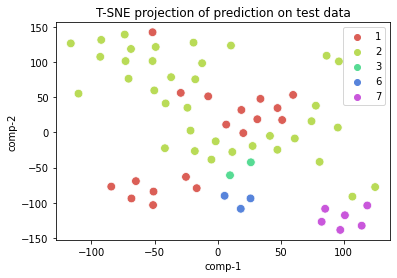

In [31]:
sns.scatterplot(x="comp-1",
                y="comp-2",
                hue=y_test_pred,
                palette=sns.color_palette("hls", len(Counter(y_test_pred))),
                data=test_tsne_df,
                s=75).set(title="T-SNE projection of prediction on test data") 

## Примечания

В датасете представлено 6 категорий стекол:

1: "building_windows_float_processed" - 70 экземпляров\
2 : "building_windows_non_float_processed" - 76 экземпляров\
3 : "vehicle_windows_float_processed" - 17 экземпляров\
5 : "containers" - 13 экземпляров\
6 : "tableware" - 9 экземпляров\
7 :"headlamps" - 29 экземпляров

После балансировки классификация объектов немного улучшилась\
GridSearch считает, что лучшей моделью для обучения стал RBF, до балансировки считалась полиномиальная модель\
Не смотря на то, что точность предсказаний увеличилась, все еще видно, что 5 категория при классификации тестовых данных RBF моделью отсутствует на графике.